# 线性回归
###### wiki:https://tangshusen.me/Dive-into-DL-PyTorch/#/chapter03_DL-basics/3.1_linear-regression?id=_31-%e7%ba%bf%e6%80%a7%e5%9b%9e%e5%bd%92

In [1]:
import torch
frpom time import time

a = torch.ones(1000)
b = torch.ones(1000)

SyntaxError: invalid syntax (<ipython-input-1-da8ea658b481>, line 2)

In [ ]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

In [ ]:
start = time()
d = a + b
print(time() - start)

# 原始实现

In [2]:
'''
通常情况下，执行最后一行plt.plot(x, y_1)代码后不会将图像给画出来，还需要执行plt.show()
之后，图像才会顺利的显示出来。但是由于%matplotlib inline这个魔法函数的存在，即使没有执
行plt.show()这行代码，图像在这里也会显示出来，这就是%matplotlib inline这行代码的作用。
'''
%matplotlib inline
import torch
from matplotlib import pyplot as plt
import numpy as np
import random

### 生成数据

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

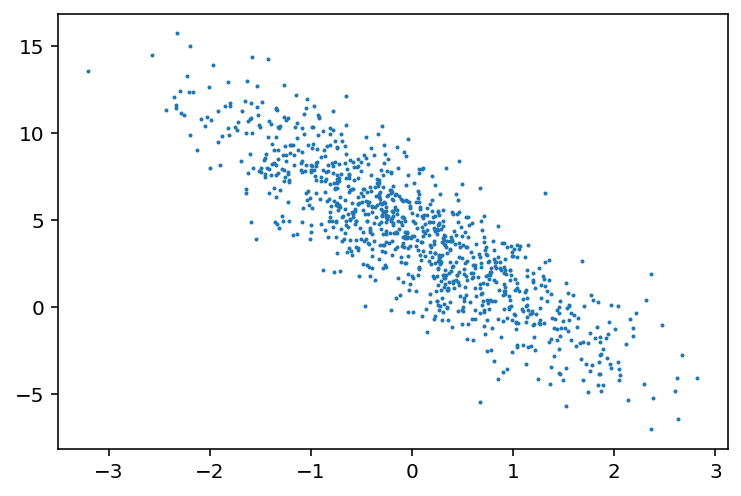

In [4]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

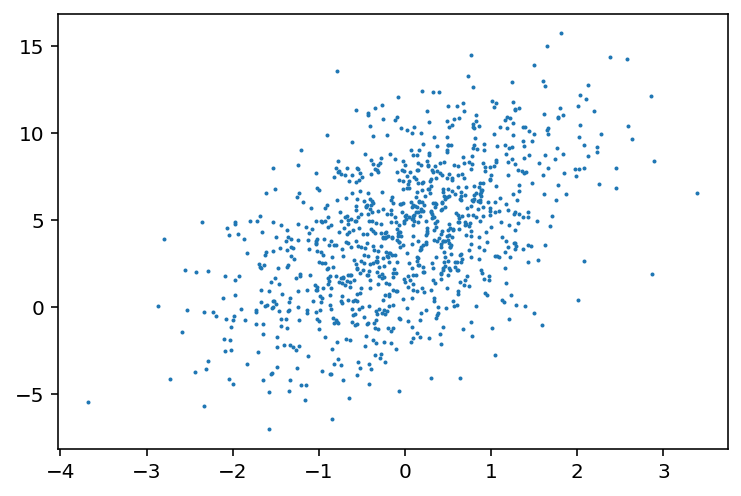

In [5]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);

### 读取数据

In [6]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-1.5346, -1.0917],
        [-0.5182,  0.6942],
        [ 1.3104,  0.5905],
        [-1.9044,  0.1394],
        [ 1.6262,  1.1428],
        [-1.4802,  0.8769],
        [-1.9837,  0.2216],
        [ 0.8888, -0.2123],
        [ 0.6285, -1.5903],
        [-1.5074, -1.6401]]) tensor([ 4.8507,  0.8146,  4.8147, -0.1109,  3.5696, -1.7440, -0.5339,  6.7122,
        10.8609,  6.7596])


### 定义模型

In [8]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)

In [9]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [10]:
# 定义模型
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

In [11]:
# 定义损失
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [12]:
# 定义优化算法
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [13]:
# 模型训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.039732
epoch 2, loss 0.000151
epoch 3, loss 0.000049


In [14]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0000],
        [-3.3994]], requires_grad=True)
4.2 
 tensor([4.1993], requires_grad=True)


# 简洁实现

In [15]:
# 读数据
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

In [16]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[-1.4822,  1.0372],
        [ 0.0775, -0.2068],
        [ 1.2891,  0.9731],
        [-0.5052,  0.1636],
        [-0.5086, -0.0763],
        [-0.4664, -0.0369],
        [ 0.7778, -0.7271],
        [ 0.3902,  0.3012],
        [ 1.0498,  2.6705],
        [ 0.1563, -0.9755]]) tensor([-2.2851,  5.0641,  3.4633,  2.6376,  3.4351,  3.3922,  8.2098,  3.9506,
        -2.7821,  7.8379])


# 简洁实现
###### 当模型结构变得更复杂时，这些步骤将变得更繁琐。其实，PyTorch提供了大量预定义的层，这使我们只需关注使用哪些层来构造模型。下面将介绍如何使用PyTorch更简洁地定义线性回归。
##### 首先，导入torch.nn模块。实际上，“nn”是neural networks（神经网络）的缩写。顾名思义，该模块定义了大量神经网络的层。之前我们已经用过了autograd，而nn就是利用autograd来定义模型。nn的核心数据结构是Module，它是一个抽象概念，既可以表示神经网络中的某个层（layer），也可以表示一个包含很多层的神经网络。在实际使用中，最常见的做法是继承nn.Module，撰写自己的网络/层。一个nn.Module实例应该包含一些层以及返回输出的前向传播（forward）方法。下面先来看看如何用nn.Module实现一个线性回归模型。

###### 注意：torch.nn仅支持输入一个batch的样本不支持单个样本输入，如果只有单个样本，可使用input.unsqueeze(0)来添加一维。

In [17]:
from torch import nn
# 写法零
class LinearNet(nn.Module):
    def __init__(self, n_feature):
#         super(LinearNet, self).__init__() #python 2
        super().__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [18]:
'''
事实上我们还可以用nn.Sequential来更加方便地搭建网络，Sequential是一个有序的容器，
网络层将按照在传入Sequential的顺序依次被添加到计算图中。
'''

# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [19]:
# 可以通过net.parameters()来查看模型所有的可学习参数，此函数将返回一个生成器。
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.4138, -0.1744]], requires_grad=True)
Parameter containing:
tensor([-0.1609], requires_grad=True)


In [20]:
# 初始化模型参数
from torch.nn import init

init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)  # 也可以直接修改bias的data: net[0].bias.data.fill_(0)

'''
注：如果这里的net是写法零代码自定义的，那么上面代码会报错，net[0].weight应改为
net.linear.weight，bias亦然。因为net[0]这样根据下标访问子模块的写法只有当net是个
ModuleList或者Sequential实例时才可以。
'''

for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0152,  0.0017]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [21]:
# 定义损失函数
'''
PyTorch在nn模块中提供了各种损失函数，这些损失函数可看作是一种特殊的层，PyTorch也将这些
损失函数实现为nn.Module的子类。我们现在使用它提供的均方误差损失作为模型的损失函数。
'''
loss = nn.MSELoss()


In [22]:
# 定义优化算法
'''
无须自己实现小批量随机梯度下降算法。torch.optim模块提供了很多常用的优化算法比如SGD、
Adam和RMSProp等。下面我们创建一个用于优化net所有参数的优化器实例，并指定学习率为0.03的
小批量随机梯度下降（SGD）为优化算法。
'''
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)


SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [23]:
# 还可以为不同子网络设置不同的学习率
# optimizer =optim.SGD([
#                 # 如果对某个参数不指定学习率，就使用最外层的默认学习率
#                 {'params': net.subnet1.parameters()}, # lr=0.03
#                 {'params': net.subnet2.parameters(), 'lr': 0.01}
#             ], lr=0.03)

In [24]:
'''
有时候不想让学习率固定成一个常数，那如何调整学习率呢？主要有两种做法。
①是修改optimizer.param_groups中对应的学习率，
②是更简单也是较为推荐的做法——新建优化器，由于optimizer十分轻量级，构建开销很小，
故而可以构建新的optimizer。

注意：但是后者对于使用动量的优化器（如Adam），会丢失动量等状态信息，可能会造成损失函数的
收敛出现震荡等情况。
'''
# # 调整学习率
# for param_group in optimizer.param_groups:
#     param_group['lr'] *= 0.1 # 学习率为之前的0.1倍
print()

In [25]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000374
epoch 2, loss: 0.000035
epoch 3, loss: 0.000137


In [26]:
dense = net
print(true_w, dense.linear.weight)
print(true_b, dense.linear.bias)


[2, -3.4] Parameter containing:
tensor([[ 1.9995, -3.3994]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2003], requires_grad=True)
